In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
sl_data = iris_data[:100, 0].copy()
sw_data = iris_data[:100, 1].copy()

In [10]:
# Mean to zero
sl_ave = np.average(sl_data)  # mean
sl_data -= sl_ave  
sw_ave = np.average(sw_data)
sw_data -= sw_ave
# Stores input in a list.
input_data = []
for i in range(100):  # 0-99 in i
    input_data.append([sl_data[i], sw_data[i]])

In [13]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

# neuron
class Neuron:
    def __init__(self):  # first setting
        self.input_sum = 0.0
        self.output = 0.0

    def set_input(self, inp):
        self.input_sum += inp

    def get_output(self):
        self.output = sigmoid(self.input_sum)
        return self.output

    def reset(self):
        self.input_sum = 0
        self.output = 0


In [20]:
# neural network
class NeuralNetwork:
    def __init__(self):  # first setting 
        # Weight (not to be changed)
        self.w_im = [4.0, 4.0], [4.0, 4.0]
        self.w_mo = [[1.0, -1.0]]  

        # Bias (not changed).
        self.b_m = [2.0, -2.0] # the number of neuron 
        self.b_o = [-0.5] 

        # Declaration of each layer
        self.input_layer = [0.0, 0.0]
        self.middle_layer = [Neuron(), Neuron()]
        self.output_layer = [Neuron()]

    def commit(self, input_data):
        # Reset of each layer
        self.input_layer[0] = input_data[0]  #  Input layer only accepts values
        self.input_layer[1] = input_data[1]
        self.middle_layer[0].reset()
        self.middle_layer[1].reset()
        self.output_layer[0].reset()

        # Input layer → Intermediate layer
        self.middle_layer[0].set_input(self.input_layer[0] * self.w_im[0][0])
        self.middle_layer[0].set_input(self.input_layer[1] * self.w_im[0][1])
        self.middle_layer[0].set_input(self.b_m[0])

        self.middle_layer[1].set_input(self.input_layer[0] * self.w_im[1][0])
        self.middle_layer[1].set_input(self.input_layer[1] * self.w_im[1][1])
        self.middle_layer[1].set_input(self.b_m[1])

        # Intermediate layer → Output layer
        self.output_layer[0].set_input(self.middle_layer[0].get_output() * self.w_mo[0][0])
        self.output_layer[0].set_input(self.middle_layer[1].get_output() * self.w_mo[0][1])
        self.output_layer[0].set_input(self.b_o[0])

        return self.output_layer[0].get_output()

In [22]:
# Neural network instances
neural_network = NeuralNetwork()

# result
st_predicted = [[], []]  # Setosa
vc_predicted = [[], []]  # Versicolor
for data in input_data:
    if neural_network.commit(data) < 0.5:
        st_predicted[0].append(data[0]+sl_ave)
        st_predicted[1].append(data[1]+sw_ave)
    else:
        vc_predicted[0].append(data[0]+sl_ave)
        vc_predicted[1].append(data[1]+sw_ave)

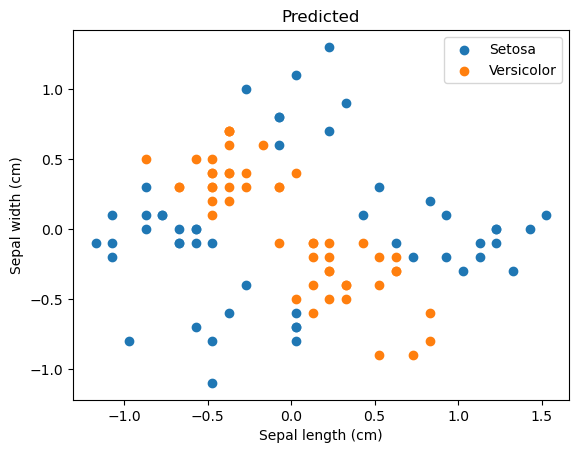

In [24]:
# Graphical display of classification results.
plt.scatter(st_predicted[0], st_predicted[1], label="Setosa")
plt.scatter(vc_predicted[0], vc_predicted[1], label="Versicolor")
plt.legend()

plt.xlabel("Sepal length (cm)")
plt.ylabel("Sepal width (cm)")
plt.title("Predicted")
plt.show()